In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Import Modellling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb


In [105]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [106]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [107]:
print(train_df.shape)
print(test_df.shape)

(8693, 14)
(4277, 13)


In [108]:
print(train_df["VIP"].isnull().sum())
print(train_df.describe())


203
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


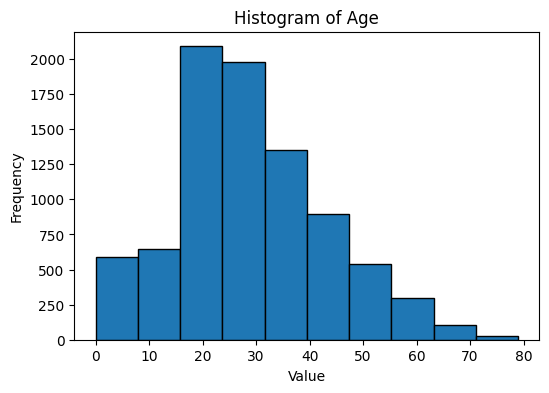

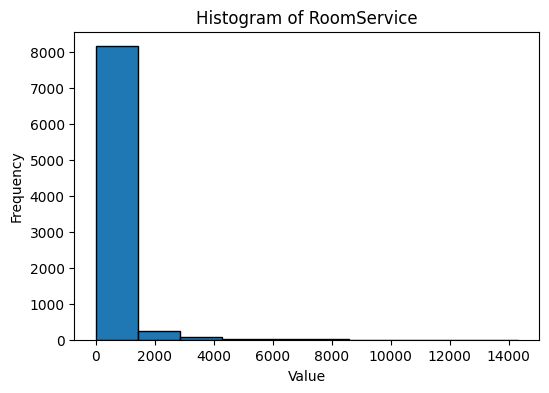

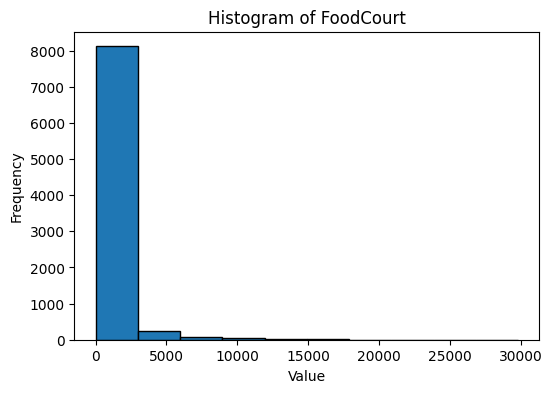

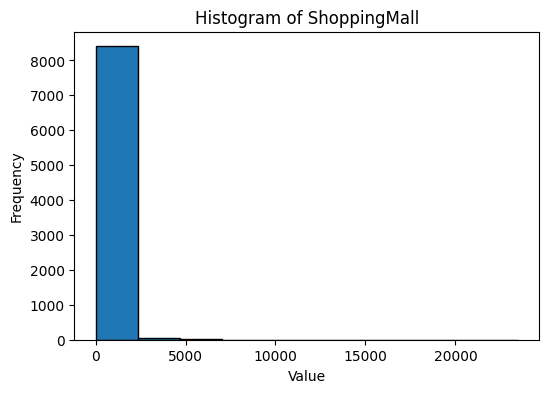

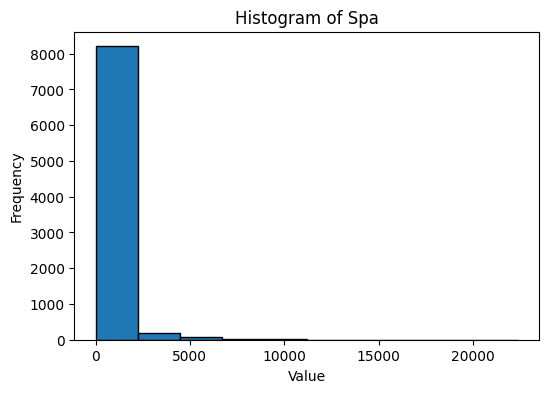

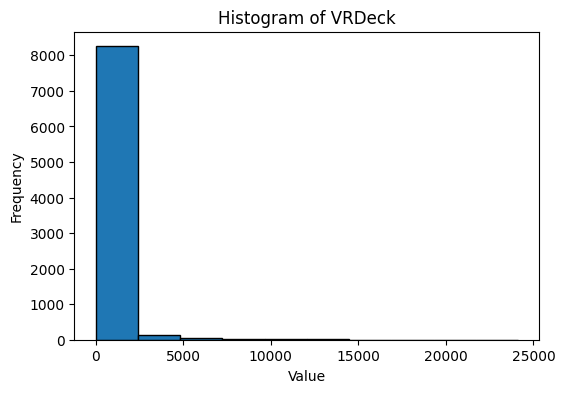

In [110]:
numeric_columns = train_df.select_dtypes(include = ["number"])

for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(numeric_columns[column], bins=10, edgecolor='k' , )
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

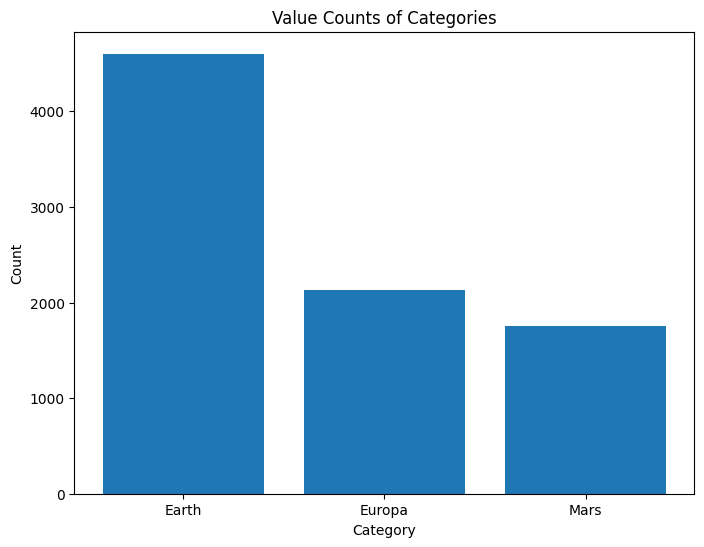

In [111]:
home_values = train_df["HomePlanet"].value_counts()
train_df["Destination"].value_counts()


plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create the bar chart
plt.bar(home_values.index, home_values.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')

# Show the chart
plt.show()


In [112]:
train_df.info()
train_df.shape
train_df[train_df['Transported']].astype(object)
train_df['Transported'] = train_df['Transported'].astype(bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


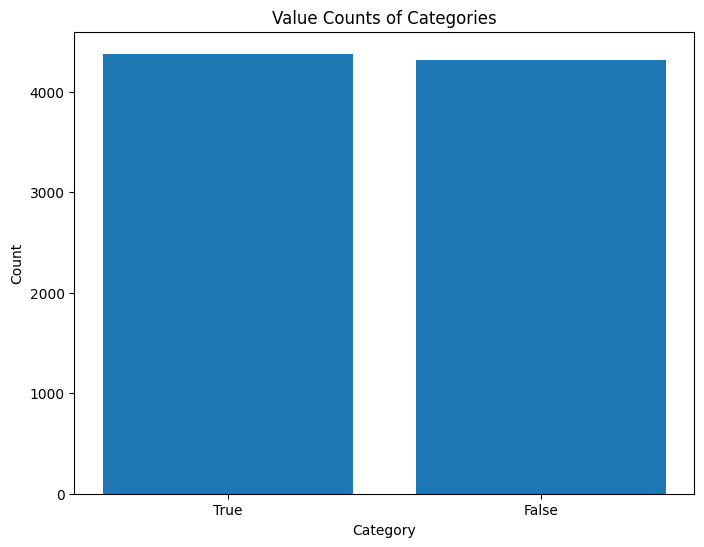

bool


In [113]:
#Outcome variable is balanced
target_values = train_df["Transported"].value_counts()

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create the bar chart
plt.bar(target_values.index.astype(str), target_values.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')

# Show the chart
plt.show()
print(target_values.index.dtype)

In [114]:
def cat_imputer(df):
  categorical_vars = df.select_dtypes(include=['object'])
  # Create a SimpleImputer with the strategy 'most_frequent'
  imputer = SimpleImputer(strategy='most_frequent')
  for i in categorical_vars:
    if df[i].isnull().sum() > 0:
      df[i] = imputer.fit_transform(df[[i]])
  return(df)

def num_imputer(df):
  numeric_vars = df.select_dtypes(exclude=['object'])
  # Create a SimpleImputer with the strategy 'most_frequent'
  imputer = SimpleImputer(strategy='median')
  for i in numeric_vars:
    if df[i].isnull().sum() > 0:
      df[i] = imputer.fit_transform(df[[i]])
  return(df)


In [115]:
train_df_01 = cat_imputer(train_df)
train_df_02 = num_imputer(train_df_01)
test_df_01 = cat_imputer(test_df)
test_df_02 = num_imputer(test_df_01)
train_df_02.isnull().sum()
train_df_02.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [116]:
def new_cols(df):
  df['total_expenses']  = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]
  df[['cabin_col1', 'cabin_col2', 'cabin_col3']] = df['Cabin'].str.split('/', expand=True)
  #df.columns = [col.lower() for col in df.columns]
  return(df)

new_cols(train_df_02)
new_cols(test_df_02)

train_df_02['cabin_col2']

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: cabin_col2, Length: 8693, dtype: object

In [157]:

columns_to_drop = ['HomePlanet', 'Cabin', 'PassengerId', 'Destination','Name','cabin_col2']
train_df_03 = train_df_02.drop(columns_to_drop, axis=1)
test_df_03 = test_df_02.drop(columns_to_drop, axis=1)

def preprocess(df):
  categorical_variables = df.select_dtypes(include = ["object"]).columns
  numeric_variables = df.select_dtypes(exclude =["object" ,"bool"]).columns
  df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
  df['cabin_col2'] = train_df_02['cabin_col2'].astype('int64')
  encoder = OneHotEncoder(sparse=True, drop='first')
  if 'transported' in df.columns:
    df['transported'] = np.where(df['transported'] == False, 0, 1)
  else:
    pass
  scaler = StandardScaler()
  df[numeric_variables] = scaler.fit_transform(df[numeric_variables])
  return df

train_set = preprocess(train_df_03)
test_set = preprocess(test_df_03)
train_set.head()
#train_df_03.drop(['passengerid', 'name', 'cabin_col2' ,'destination', 'homeplanet', 'cabin'], axis=1)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_expenses,CryoSleep_True,VIP_True,cabin_col1_B,cabin_col1_C,cabin_col1_D,cabin_col1_E,cabin_col1_F,cabin_col1_G,cabin_col1_T,cabin_col3_S,cabin_col2
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,-0.514066,0,0,1,0,0,0,0,0,0,0,0
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,True,-0.251479,0,0,0,0,0,0,1,0,0,1,0
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,False,3.190333,0,1,0,0,0,0,0,0,0,1,0
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,False,1.332604,0,0,0,0,0,0,0,0,0,1,0
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,True,-0.124824,0,0,0,0,0,0,1,0,0,1,1


In [171]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from xgboost.sklearn import XGBClassifier

X_train, y_train = train_set.drop('Transported', axis=1), train_set['Transported']

rfm = RandomForestClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
sgd = SGDClassifier(loss='log', max_iter=1000, random_state=42)


models = [rfm, lgb, xgb, sgd]

# Define the hyperparameter grid for grid search
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0],
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.3]}

# Initialize a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

xgb_model = XGBClassifier(learning_rate=0.1, max_depth = 4, n_estimators=200)
xgb_fit = xgb_model.fit(X_train, y_train)
predictions = xgb_fit.predict(test_set)
# for model in models:
#   model.fit(X_train,y_train)
#   pred = model.predict(X_test)
#   accuracy = accuracy_score(y_test, pred)
#   print(f"Accuracy of {model}:", accuracy)


test_set['Transported'] = predictions
test_set['PassengerId'] = test_df['PassengerId']
test_set['Transported'] = np.where(test_set['Transported'] == 0, False, True)

submission = test_set[['PassengerId','Transported']]
submission.to_csv('/content/submission.csv', index=False)

pd.show_versions()

In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Specify hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# Train a LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("LightGBM Accuracy:", accuracy)








AttributeError: ignored